# Boston House Price Prediction

In [76]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.animation import FuncAnimation

In [77]:
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from IPython.display import HTML

# STEP1:Load the data 

In [43]:
boston=load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [78]:


features=pd.DataFrame(boston.data,columns=boston.feature_names)
features

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [45]:
target=pd.DataFrame(boston.target,columns=['target'])
target

,target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [46]:
df=pd.concat([features,target],axis=1)

In [47]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


### Describe Function

In [48]:
df.describe().round(decimals=2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


# STEP2:To find the co-relation between attributes and target

In [49]:
corr=df.corr('pearson')
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [50]:
corrs=[abs(corr[attr]['target']) for attr in list(features)]
corrs

[0.3883046085868114,
 0.3604453424505447,
 0.483725160028373,
 0.1752601771902975,
 0.4273207723732817,
 0.6953599470715389,
 0.3769545650045959,
 0.24992873408590394,
 0.3816262306397776,
 0.46853593356776646,
 0.507786685537561,
 0.33346081965706653,
 0.7376627261740143]

In [51]:
l=list(zip(corrs,list(features)))
l

[(0.3883046085868114, 'CRIM'),
 (0.3604453424505447, 'ZN'),
 (0.483725160028373, 'INDUS'),
 (0.1752601771902975, 'CHAS'),
 (0.4273207723732817, 'NOX'),
 (0.6953599470715389, 'RM'),
 (0.3769545650045959, 'AGE'),
 (0.24992873408590394, 'DIS'),
 (0.3816262306397776, 'RAD'),
 (0.46853593356776646, 'TAX'),
 (0.507786685537561, 'PTRATIO'),
 (0.33346081965706653, 'B'),
 (0.7376627261740143, 'LSTAT')]

### sort in descending order using lambda function

In [52]:
l.sort(key=lambda y:y[0],reverse=True)
l

[(0.7376627261740143, 'LSTAT'),
 (0.6953599470715389, 'RM'),
 (0.507786685537561, 'PTRATIO'),
 (0.483725160028373, 'INDUS'),
 (0.46853593356776646, 'TAX'),
 (0.4273207723732817, 'NOX'),
 (0.3883046085868114, 'CRIM'),
 (0.3816262306397776, 'RAD'),
 (0.3769545650045959, 'AGE'),
 (0.3604453424505447, 'ZN'),
 (0.33346081965706653, 'B'),
 (0.24992873408590394, 'DIS'),
 (0.1752601771902975, 'CHAS')]

In [53]:
corrs,labels=list(zip(*l))

### Daraw the bar graph to find highest abs co-relation values

In [54]:
index=np.arange(len(labels))
index

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

<function matplotlib.pyplot.show(*args, **kw)>

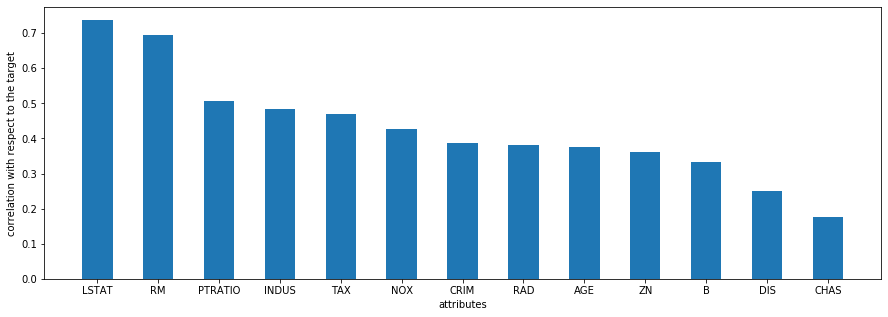

In [55]:
plt.figure(figsize=(15,5))
plt.bar(index,corrs,width=0.5)
plt.xlabel('attributes')
plt.ylabel('correlation with respect to the target')
plt.xticks(index,labels)
plt.show

# Step:3  normalise  the data

In [56]:
X=df['LSTAT'].values
Y=df['target'].values

In [57]:
print(Y[:5])

[24.  21.6 34.7 33.4 36.2]


In [58]:
x_scaler=MinMaxScaler()
X=x_scaler.fit_transform(X.reshape(-1,1))
X=X[:,-1]
y_scaler=MinMaxScaler()
Y=y_scaler.fit_transform(Y.reshape(-1,1))
Y=Y[:,-1]


In [59]:
print(Y[:5])

[0.42222222 0.36888889 0.66       0.63111111 0.69333333]


### to calculate mse from  sklearn

In [60]:
mean_squared_error(X,Y)

0.14751936169733662

### to calculate mean square error

In [61]:
n=2
def error(m,x,c,t):
    N=x.size
    e=sum(((m*x+c)-t)**2)
    return e*1/(2*n)

# step4: to split the data

In [62]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.5)
xtrain,xtest,ytrain,ytest

(array([0.41418322, 0.44674393, 0.40342163, 0.21937086, 0.08195364,
        0.10899558, 0.10789183, 0.2442053 , 0.2348234 , 0.4415011 ,
        0.33388521, 0.25496689, 0.61396247, 0.10375276, 0.38576159,
        0.04415011, 0.30739514, 0.20860927, 0.11975717, 0.10458057,
        0.07753863, 0.32339956, 0.3504415 , 0.31843267, 0.52759382,
        0.37086093, 0.08636865, 0.50193157, 0.19426049, 0.14348786,
        0.09354305, 0.34133554, 0.40673289, 0.61672185, 0.59437086,
        0.34878587, 0.21109272, 0.45060706, 0.1683223 , 0.42384106,
        0.48675497, 0.901766  , 0.03807947, 0.14155629, 0.29083885,
        0.20502208, 0.17853201, 0.54442605, 0.71688742, 0.18984547,
        0.68129139, 0.12196468, 0.43791391, 0.09713024, 0.60871965,
        0.73261589, 0.31208609, 0.18018764, 0.44701987, 0.32891832,
        0.12582781, 0.14266004, 0.21550773, 0.91169978, 0.69094923,
        0.24365342, 0.22268212, 0.33857616, 0.21688742, 0.10596026,
        0.43901766, 0.41004415, 0.27345475, 0.23

# Step5:Linear Regression

### y=m(x)+c

# update function

In [63]:
def update(m,x,c,t,learning_rate):
    grad_m=sum(2*((m*x+c)-t)*x)
    grad_c=sum(2*((m*x+c)-t))
    m=m-grad_m*learning_rate
    c=c-grad_c*learning_rate
    return m,c

### error function

In [64]:
def error(m,x,c,t):
    N=x.size
    e=sum(((m*x+c)-t)**2)
    return e*1/(2*N)

### m=m-&m*a      c=c-&c*a

# Gradient Descent Function

In [65]:
def gradient_descent(init_m,init_c,x,t,learning_rate,iterations,error_threshold):
    m=init_m
    c=init_c
    error_values=list()
    mc_values=list()
    for i in range(iterations):
        e=error(m,x,c,t)
        if e < error_threshold:
            print("error less than threshold")
            break

        error_values.append(e)
        m,c=update(m,x,c,t,learning_rate)
        mc_values.append((m,c))
    return m,c,error_values,mc_values

## run the descent function

In [66]:
%%time
init_m=0.9
init_c=0
learning_rate=0.001
iterations=250
error_threshold=0.001


m,c,error_values,mc_values=gradient_descent(init_m,init_c,xtrain,ytrain,learning_rate,iterations,error_threshold)

Wall time: 36 ms


In [67]:
#as the number of iterations increases,change in the line are less notificable
mc_values_anim=mc_values[0:250:5]


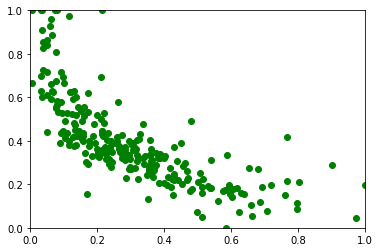

In [68]:
fig,ax=plt.subplots()
ln, =plt.plot([],[], 'ro-', animated=True)

def init():
    plt.scatter(xtest,ytest,color='g')
    ax.set_xlim(0,1.0)
    ax.set_ylim(0,1.0)
    return ln,

def update_frame(frame):
    m,c=mc_values_anim[frame]
    x1,y1=-0.5,m*-.5+c
    x2,y2=1.5,m*1.5+c
    ln.set_data([x1,x2],[y1,y2])
    return ln,
    
anim=FuncAnimation(fig, update_frame,frames=range(len(mc_values_anim)),init_func=init,blit=True)
anim

    

# Error Visualisation in boston housing problem 

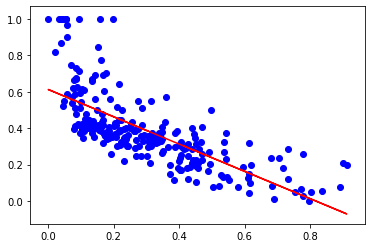

In [69]:
plt.scatter(xtrain,ytrain,color='b')
plt.plot(xtrain,(m*xtrain+c),color='r')

### plotting error values

Text(0.5, 0, 'Iterations')

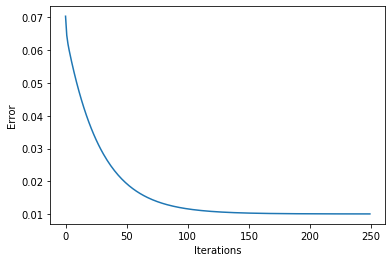

In [70]:
plt.plot(np.arange(len(error_values)),error_values)
plt.ylabel('Error')
plt.xlabel('Iterations')

# Prediction of house prices

In [71]:
predicted=(m*xtest)+c


In [72]:
mean_squared_error(ytest,predicted)

0.017867215962221305

In [73]:
#combine data set
p=pd.DataFrame(list(zip(xtest,ytest,predicted)),columns=['x','Y_target','Predicted'])
p.head()

,x,Y_target,Predicted
0,0.480684,0.491111,0.252202
1,0.135762,0.520000,0.510398
2,0.282561,0.333333,0.400510
3,0.233996,0.317778,0.436864
4,0.516556,0.222222,0.225349


### Plot the Predicted values against plotted values

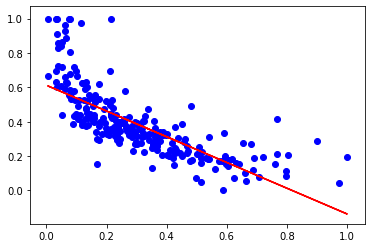

In [74]:
plt.scatter(xtest,ytest,color='b')
plt.plot(xtest,predicted,color='r')

# normalizatiom to predict the prices of the house

In [75]:
predicted=predicted.reshape(-1,1)
xtest=xtest.reshape(-1,1)
ytest=ytest.reshape(-1,1)

xtest_scaled=x_scaler.inverse_transform(xtest)
ytest_scaled=y_scaler.inverse_transform(ytest)
predicted_scaled=y_scaler.inverse_transform(predicted)

xtest_scaled=xtest_scaled[:,-1]
ytest_scaled=ytest_scaled[:,-1]
predicted_scaled=predicted_scaled[:,-1]
p=pd.DataFrame(list(zip(xtest,ytest,predicted)),columns=['x','Y_target','Predicted'])
p=p.round(decimals=1)
p.head()


,x,Y_target,Predicted
0,[0.4806843267108167],[0.4911111111111112],[0.2522016492319649]
1,[0.1357615894039735],[0.5199999999999999],[0.5103981267737338]
2,[0.282560706401766],[0.33333333333333337],[0.4005097059319569]
3,[0.2339955849889625],[0.3177777777777778],[0.43686376996983795]
4,[0.5165562913907285],[0.22222222222222227],[0.2253492155676209]
